# Now Insurance Loss Runs #
## automatic extraction of relevant information in loss reports from pdf files ##

In [1]:
## load depedencies 
import lossrun
import matplotlib.pyplot as plt

## Pre-processing ##

In [14]:
## Select file


# pdf raw file no ext 
#__________________________________________
#pdf_file = 'AHC-0000343 loss runs PIO-YES0'
#___________________________________________

#__________________________________________
#pdf_file = 'knox_medex_loss_runs_attain_4 FIR-NO1'
#___________________________________________

#__________________________________________
pdf_file = 'knox_medex_loss_runs_attain_4 FIR-NO1'
#___________________________________________


# topic files
topic_file = 'config_topics_beta.ino'
# Pre proc data
txt_dict, image_c, image, topics = lossrun.pre_proc(pdf_file, 'data', topic_file)


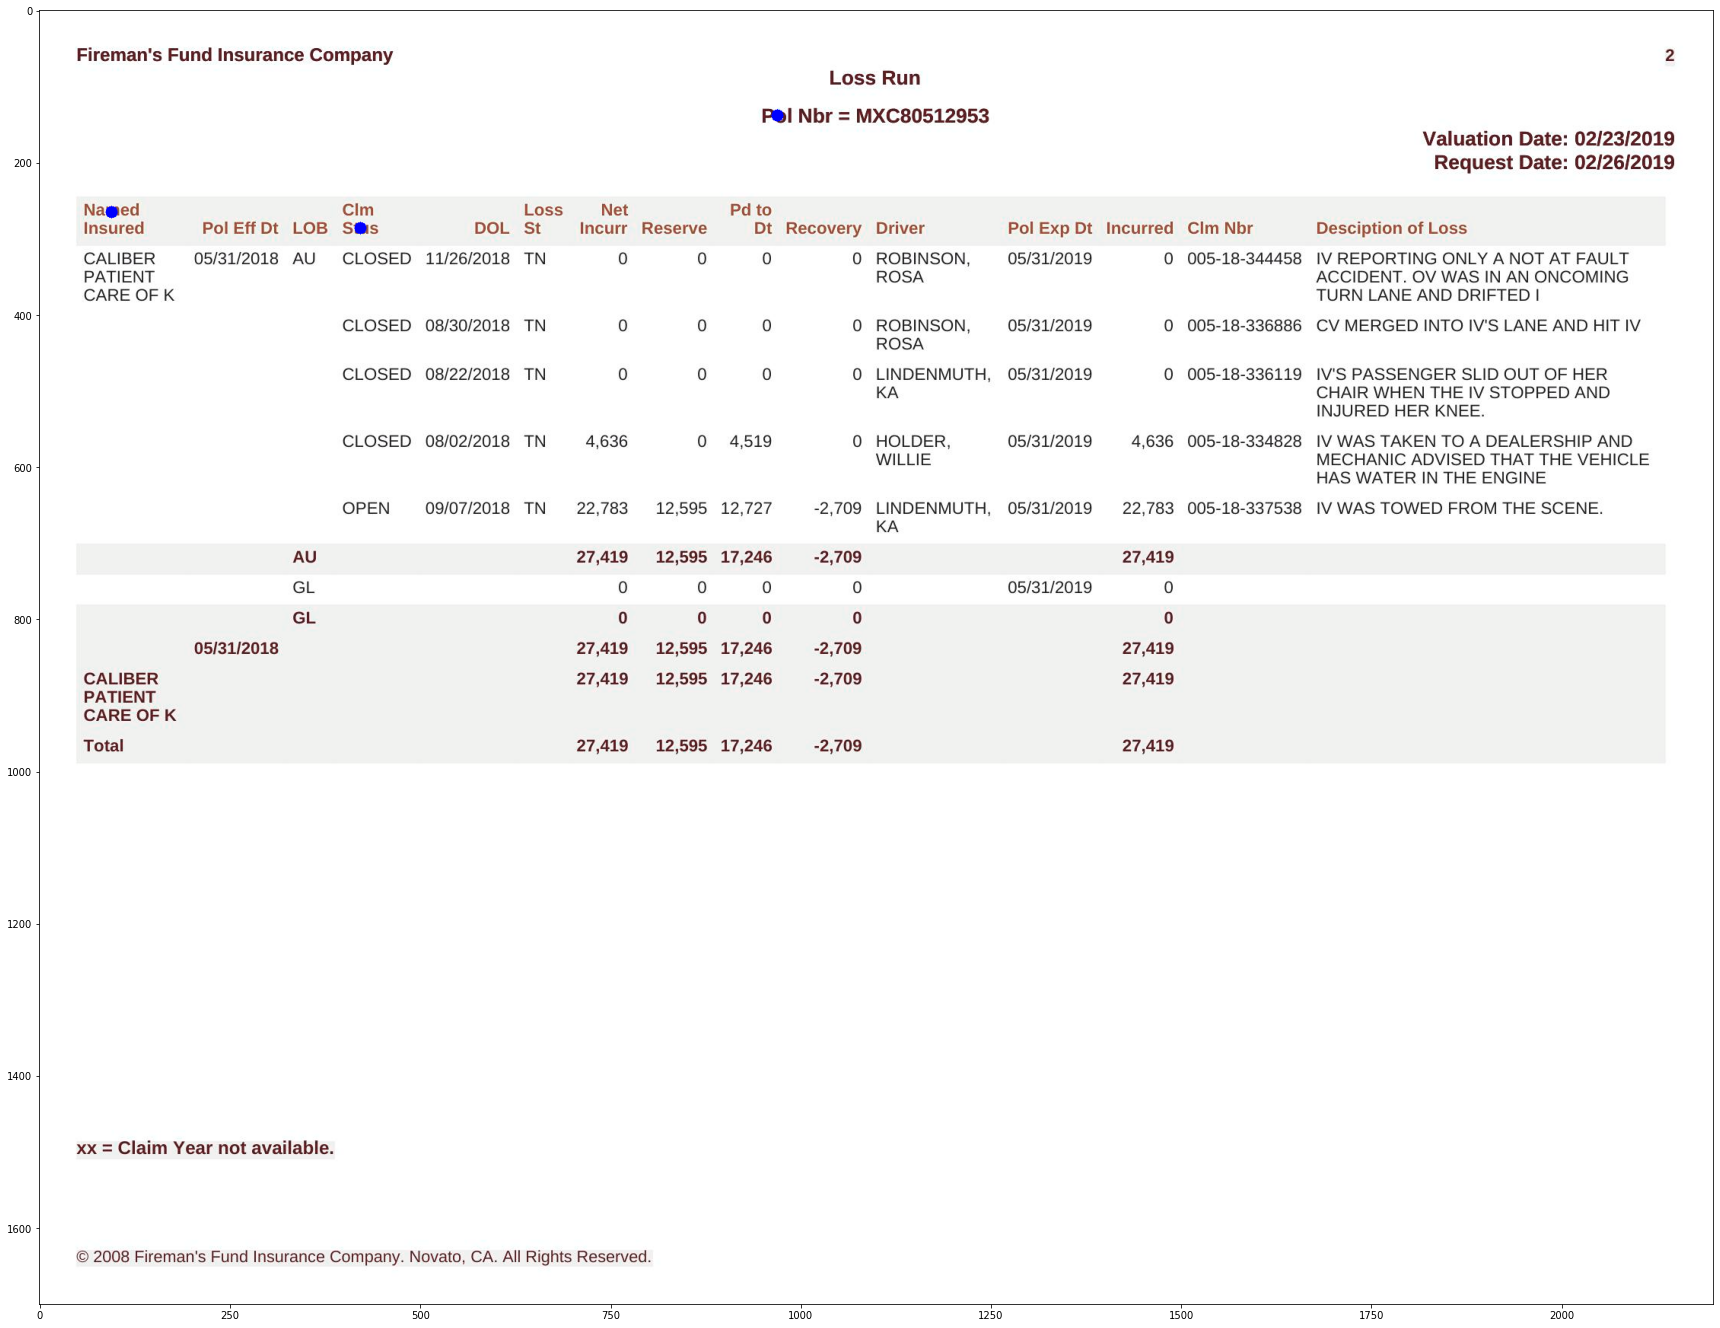

In [15]:
# vizualizate data
plt.figure(figsize=(30,30))
# Orignial data
plt.imshow(image_c)
# Orignial data


## Spatial relation filter ##

In [16]:
## load topics

# search topics in data pre - proc
spatial_filter = lossrun.spatial_filter(txt_dict, topics)
spatial_filter_topics = len(spatial_filter)

for topic in range(spatial_filter_topics):
# data ver
    print('SEARCHING TOPIC: ' + topics[topic][0])
    print('In: ' + ' '.join(spatial_filter[topic]) )
    print('.'*100 + '\n')

SEARCHING TOPIC: policy_num
In: to  Dt    Recovery Nbr = MXC80512953
....................................................................................................

SEARCHING TOPIC: claimant
In:  Insured  CALIBER  PATIENT  CARE OF  CALIBER  PATIENT  CARE OF  Total    xx = Claim    © 2008 Fireman's Cclm Pol EffDt LOB Stus    DOL    Loss    St    Net  Incurr    Reserve    Pd to  Dt    Recovery    Driver    Pol Exp Dt Incurred    Clm Nbr    Desciption of Loss
....................................................................................................

SEARCHING TOPIC: status
In: CLOSED  CLOSED  CLOSED  CLOSED  OPEN Company.    DOL    St  Incurr    Reserve  Dt    Recovery    Driver    Pol Exp Dt Incurred    Clm Nbr    Desciption of Loss
....................................................................................................



## Name entity recognition ##

In [17]:
import spacy 
from configobj import ConfigObj


nlp = spacy.load('en_core_web_lg')

ner_rules = ConfigObj('config_rules_beta.ino')


for i in range(len(spatial_filter)):
    string = ' '.join(spatial_filter[:][i])
    
    doc = nlp(string)

    for j in range(len(ner_rules[topics[i][0]])):

        for ent in doc.ents:
            
            #if ent.label_ == ner_rules[topics[i][0]]:
        
            print(topics[i][0], ent.text, ner_rules[topics[i][0]], ent.label_)



claimant Fireman's ['PERSON', 'ORG'] ORG
claimant Cclm Pol ['PERSON', 'ORG'] PERSON
claimant LOB Stus ['PERSON', 'ORG'] PERSON
claimant Fireman's ['PERSON', 'ORG'] ORG
claimant Cclm Pol ['PERSON', 'ORG'] PERSON
claimant LOB Stus ['PERSON', 'ORG'] PERSON


## Contextual analysis

In [6]:
# Call the model 
model = lossrun.load_context_model()

In [7]:
similar = []
try:
    similar.append(model.most_similar_to_given('ORG', txt_dict['text']))
except: 
    similar.append('0')

similar

['0']

In [8]:
# check topic
_topic = 'Carried'

relates_words_index = []

rate_relation = 0.2 # where grammar  correlation goes to -1 to 1 

for i in txt_dict['text']:

    try:
        relates_words_index.append(model.similarity(_topic, i))
    except:
        relates_words_index.append(0)
#model.similarity()
for index, relate_rate in enumerate(relates_words_index):

    if (relate_rate > .2):
        #print(index)
        print(txt_dict['text'][index])

Reported
Paid
Paid
Incurred
